In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import os
import sys

In [2]:
# Cartella del progetto (una sopra rispetto al notebook)
BASE_DIR = os.path.abspath(os.path.join(os.getcwd(), ".."))

# Percorso al CSV
DATA_PATH = os.path.join(BASE_DIR, "data", "cardio_clean.csv")
df = pd.read_csv(DATA_PATH)
df=df.drop(columns=['id','bmi_cat'])
# Separazione delle caratteristiche (X) e del target (y)
X = df.drop('cardio', axis=1)
y = df['cardio']

In [3]:
df

,age,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio,gender_2,cholesterol_2,cholesterol_3,gluc_2,gluc_3,BMI,bmi_obeso,bmi_sottopeso,bmi_sovrappeso
0,50,168,62.0,110,80,0,0,1,0,True,False,False,False,False,21.967120,False,False,False
1,55,156,85.0,140,90,0,0,1,1,False,False,True,False,False,34.927679,True,False,False
2,51,165,64.0,130,70,0,0,0,1,False,False,True,False,False,23.507805,False,False,False
3,48,169,82.0,150,100,0,0,1,1,True,False,False,False,False,28.710479,False,False,True
4,47,156,56.0,100,60,0,0,0,0,False,False,False,False,False,23.011177,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66166,57,165,80.0,150,80,0,0,1,1,False,False,False,False,False,29.384757,False,False,True
66167,52,168,76.0,120,80,1,0,1,0,True,False,False,False,False,26.927438,False,False,True
66168,61,158,126.0,140,90,0,0,1,1,False,True,False,True,False,50.472681,True,False,False
66169,61,163,72.0,135,80,0,0,0,1,False,False,False,True,False,27.099251,False,False,True


In [4]:
#divisone train test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)
print(len(X_train), len(y_train))
print(len(X_test), len(y_test)) 

52936 52936
13235 13235


In [5]:
#standardizzazione
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)
y_pred_lr = model.predict(X_test_scaled)

In [7]:
print(X.columns.tolist())

['age', 'height', 'weight', 'ap_hi', 'ap_lo', 'smoke', 'alco', 'active', 'gender_2', 'cholesterol_2', 'cholesterol_3', 'gluc_2', 'gluc_3', 'BMI', 'bmi_obeso', 'bmi_sottopeso', 'bmi_sovrappeso']


In [8]:
import pickle

with open("model.pkl", "wb") as f:
    pickle.dump(model, f)

# --- SALVATAGGIO SCALER ---
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

In [9]:

with open("model.pkl", "rb") as f:
    model = pickle.load(f)

print(X_train)

       age  height  weight  ap_hi  ap_lo  smoke  alco  active  gender_2  \
29931   47     165    65.0    110     80      0     0       1     False   
25957   62     167    69.0    130     90      0     0       1      True   
39143   54     169    65.0    120     80      0     0       1     False   
55827   49     171    70.0    120     80      1     1       1      True   
24657   45     170    90.0    170    100      0     1       1      True   
...    ...     ...     ...    ...    ...    ...   ...     ...       ...   
62855   57     163    56.0    120     80      0     0       1      True   
156     50     158    72.0    120     80      0     0       1     False   
43569   42     172    70.0    130     90      0     0       0      True   
61513   50     164    61.0    150     90      0     0       1     False   
31842   56     168    70.0    140     80      0     0       1      True   

       cholesterol_2  cholesterol_3  gluc_2  gluc_3        BMI  bmi_obeso  \
29931          False  

In [7]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))

Confusion Matrix:
[[5306 1406]
 [2193 4330]]

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.79      0.75      6712
           1       0.75      0.66      0.71      6523

    accuracy                           0.73     13235
   macro avg       0.73      0.73      0.73     13235
weighted avg       0.73      0.73      0.73     13235



In [8]:
# Probabilità di appartenenza alla classe 1 (rischio cardiaco)
prob_rischio = model.predict_proba(X_test_scaled)[:, 1]

# Mostra le prime 10 probabilità
print(prob_rischio[:10])

[0.31443437 0.30173129 0.39332835 0.45003553 0.75108674 0.70362047
 0.29743586 0.84442461 0.74210586 0.33275458]


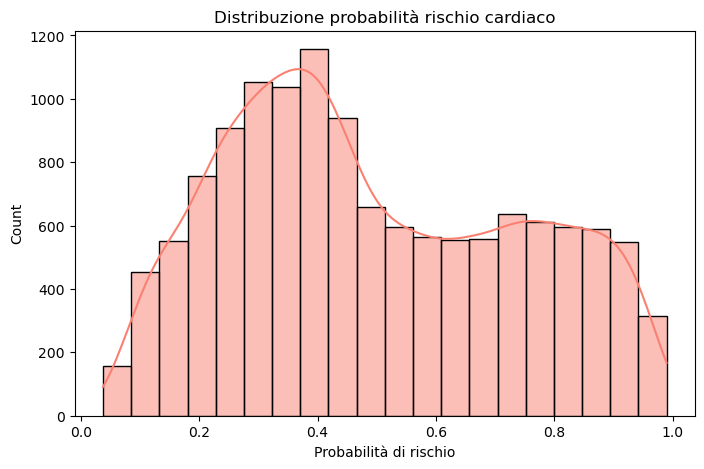

In [9]:
# prob_rischio: array con le probabilità di classe 1
plt.figure(figsize=(8,5))
sns.histplot(prob_rischio, bins=20, kde=True, color='salmon')
plt.title('Distribuzione probabilità rischio cardiaco')
plt.xlabel('Probabilità di rischio')
plt.show()

In [10]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
rf_model = RandomForestClassifier(n_estimators=500, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=42)

In [25]:
#Predizioni e probabilità
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:,1]

In [26]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

Confusion Matrix:
[[4821 1891]
 [2019 4504]]

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.72      0.71      6712
           1       0.70      0.69      0.70      6523

    accuracy                           0.70     13235
   macro avg       0.70      0.70      0.70     13235
weighted avg       0.70      0.70      0.70     13235



In [27]:
print("Confusion Matrix a confronto:")
print(confusion_matrix(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_rf))

print("\nClassification Report a confronto:\n")
print('Regrossione Logistica\n',classification_report(y_test, y_pred_lr))
print('Random Forest\n',classification_report(y_test, y_pred_rf))

Confusion Matrix a confronto:
[[5306 1406]
 [2193 4330]]
[[4821 1891]
 [2019 4504]]

Classification Report a confronto:

Regrossione Logistica
               precision    recall  f1-score   support

           0       0.71      0.79      0.75      6712
           1       0.75      0.66      0.71      6523

    accuracy                           0.73     13235
   macro avg       0.73      0.73      0.73     13235
weighted avg       0.73      0.73      0.73     13235

Random Forest
               precision    recall  f1-score   support

           0       0.70      0.72      0.71      6712
           1       0.70      0.69      0.70      6523

    accuracy                           0.70     13235
   macro avg       0.70      0.70      0.70     13235
weighted avg       0.70      0.70      0.70     13235



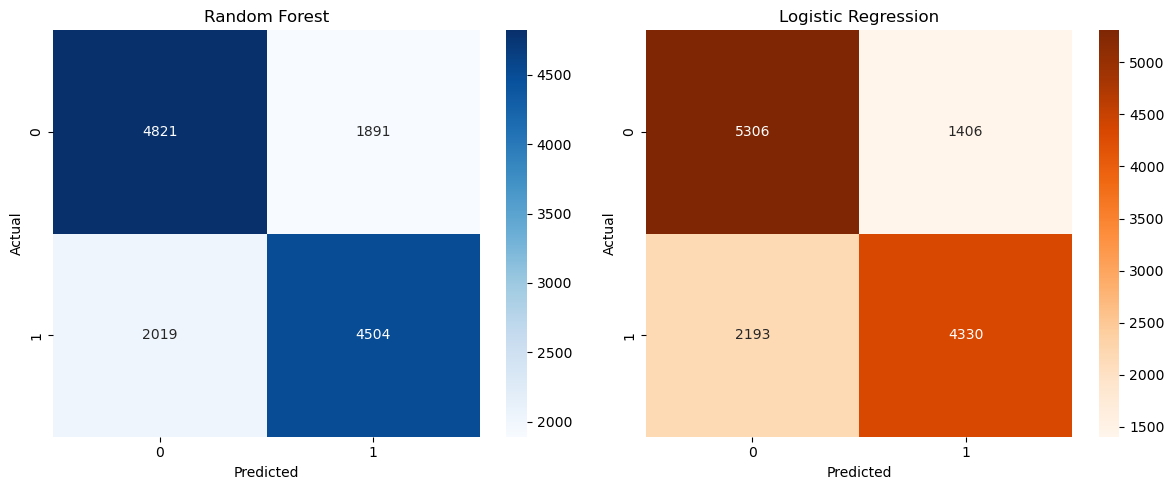

In [ ]:
# Creiamo le matrici di confusione
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_lr = confusion_matrix(y_test, y_pred_lr)

# Creiamo la figura con due subplot affiancati
fig, axes = plt.subplots(1, 2, figsize=(12,5))

# Random Forest
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Random Forest')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# Logistic Regression
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Oranges', ax=axes[1])
axes[1].set_title('Logistic Regression')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()


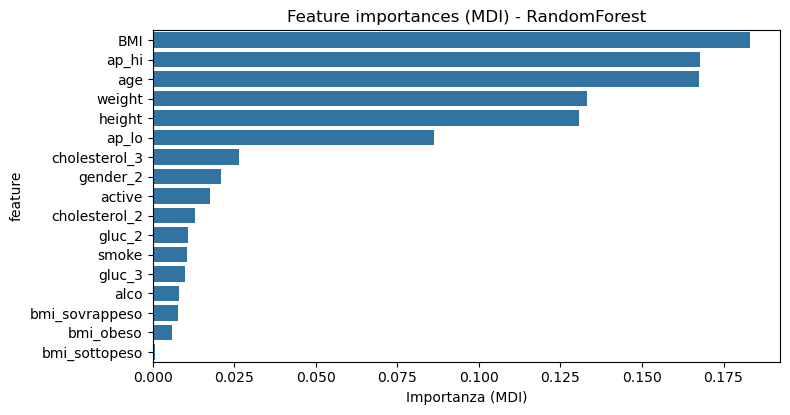

In [29]:
feature_names = X.columns.tolist()  # usa nomi reali
importances = rf_model.feature_importances_

df_importances = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
})

df_importances = df_importances.sort_values(by='importance', ascending=False)

plt.figure(figsize=(8, max(4, len(feature_names) * 0.25)))
sns.barplot(x='importance', y='feature', data=df_importances)
plt.xlabel('Importanza (MDI)')
plt.title('Feature importances (MDI) - RandomForest')
plt.tight_layout()
plt.show()

In [30]:
top_features = df_importances.head(10)['feature'].tolist()
print("Top feature selezionate:", top_features)

Top feature selezionate: ['BMI', 'ap_hi', 'age', 'weight', 'height', 'ap_lo', 'cholesterol_3', 'gender_2', 'active', 'cholesterol_2']


In [31]:
X_top = X[top_features]

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_top, y, test_size=0.2, random_state=42, stratify=y)

rf_top = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)
rf_top.fit(X_train, y_train)

y_pred_top = rf_top.predict(X_test)
print(classification_report(y_test, y_pred_top))

              precision    recall  f1-score   support

           0       0.71      0.79      0.75      6712
           1       0.76      0.67      0.71      6523

    accuracy                           0.73     13235
   macro avg       0.73      0.73      0.73     13235
weighted avg       0.73      0.73      0.73     13235



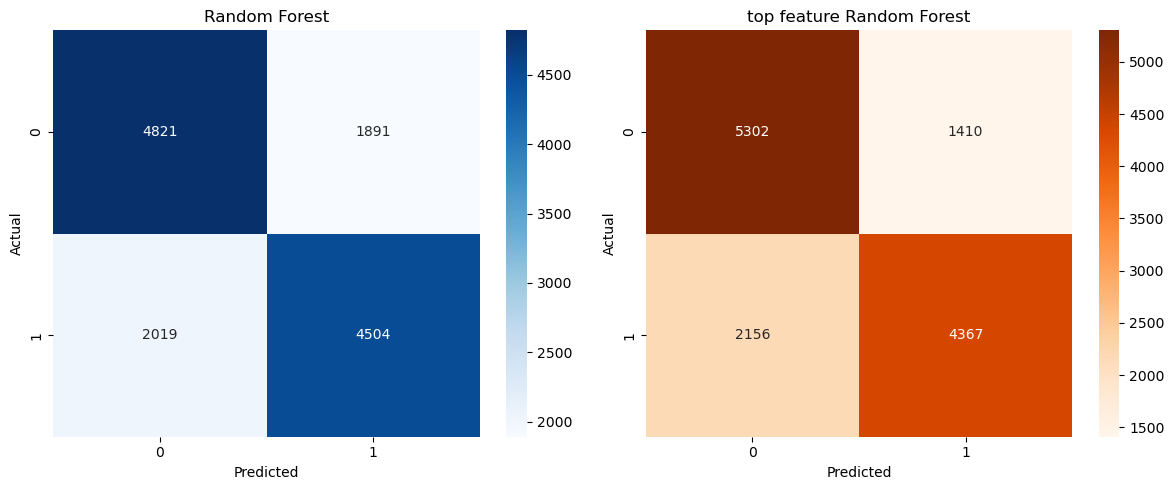

In [33]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_top = confusion_matrix(y_test, y_pred_top)

# Creiamo la figura con due subplot affiancati
fig, axes = plt.subplots(1, 2, figsize=(12,5))

# Random Forest
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Random Forest')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# Logistic Regression
sns.heatmap(cm_top, annot=True, fmt='d', cmap='Oranges', ax=axes[1])
axes[1].set_title('top feature Random Forest')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

In [34]:
print("\nClassification Report a confronto:\n")
print('Top feature random forest\n',classification_report(y_test, y_pred_top))
print('Random Forest\n',classification_report(y_test, y_pred_rf))


Classification Report a confronto:

Top feature random forest
               precision    recall  f1-score   support

           0       0.71      0.79      0.75      6712
           1       0.76      0.67      0.71      6523

    accuracy                           0.73     13235
   macro avg       0.73      0.73      0.73     13235
weighted avg       0.73      0.73      0.73     13235

Random Forest
               precision    recall  f1-score   support

           0       0.70      0.72      0.71      6712
           1       0.70      0.69      0.70      6523

    accuracy                           0.70     13235
   macro avg       0.70      0.70      0.70     13235
weighted avg       0.70      0.70      0.70     13235

